In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
!pip install mlflow


In [49]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [50]:
mlflow.set_tracking_uri("http://127.0.0.1:5000/")  # This is the default local tracking server
mlflow.set_experiment("Slary prediction")


MlflowException: API request to http://127.0.0.1:5000/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=Slary+prediction (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000020B5EB00F80>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [5]:
df = pd.read_csv('Salary_data.csv')

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.shape

(30, 2)

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [12]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [15]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 3, random_state = 0)

In [ ]:
with mlflow.start_run():
    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    
    # Log model parameters
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Log metrics
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric("accuracy", accuracy)
    
    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")
    
    print(f'Accuracy: {accuracy * 100:.2f}%')


2024/12/19 23:46:33 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [25]:
print(x_train)

[[ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [26]:
print(x_test)

[[ 1.5]
 [10.3]
 [ 4.1]]


In [27]:
print(y_train, y_test)

[ 63218. 116969. 109431. 112635.  55794.  83088. 101302.  56642.  66029.
  64445.  61111. 113812.  91738.  46205. 121872.  60150.  39891.  81363.
  93940.  57189.  54445. 105582.  43525.  39343.  98273.  67938.  56957.] [ 37731. 122391.  57081.]


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)

In [28]:
print(y_pred, x_pred)

[ 40628.97301142 123152.87216178  65011.03412402] [ 63135.49096152 115650.69951175 108148.52686171 116588.471093
  64073.26254277  76264.29309907 100646.35421168  53757.77514898
  74388.74993657  56571.08989274  68762.12044904 103459.66895544
  90330.86681788  38753.42984891 125028.41532429  54695.54673023
  47193.3740802   81890.9225866   82828.69416785  61259.94779901
  56571.08989274 110961.84160547  45317.83091769  36877.8866864
  93144.18156165  72513.20677406  64073.26254277]


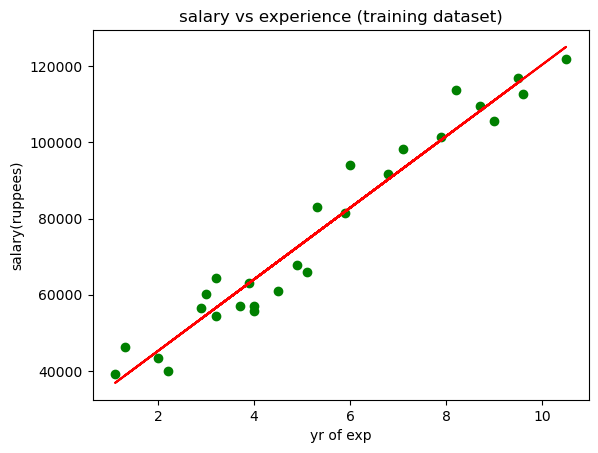

In [38]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, x_pred, color = 'red')
plt.title("salary vs experience (training dataset)")
plt.xlabel("yr of exp")
plt.ylabel("salary(ruppees)")
plt.show()

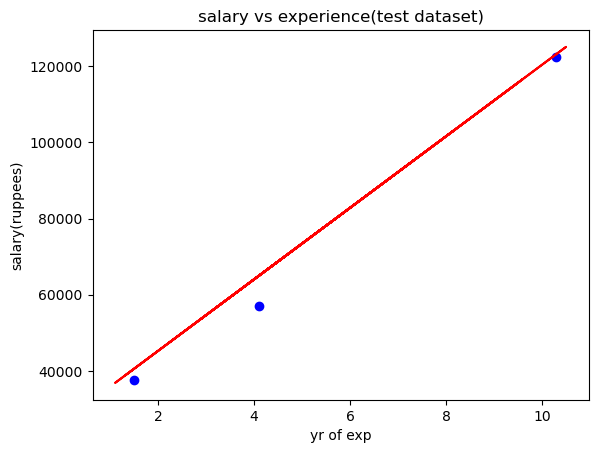

In [46]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, x_pred, color = 'red')
plt.title('salary vs experience(test dataset)')
plt.xlabel("yr of exp")
plt.ylabel("salary(ruppees)")
plt.show()
